In [3]:
using Catlab, Catlab.Graphics
using AlgebraicPetri
using OrdinaryDiffEq, Plots
using LabelledArrays
using GraphViz

# The Brusselator

This notebook creates a Petri net for a [Brusselator](https://en.wikipedia.org/wiki/Brusselator) reaction network:

$$  A \rightarrow X$$

$$  2X + Y \rightarrow 3X$$

$$  B + X \rightarrow Y + D$$

$$  X \rightarrow E$$

In comparison to the reaction net above, our Petri net adds in an output arc from the `t1` transition to the `A` species and from the `t3` transition to the `B` in order to keep the concentrations of `A` and `B` constant. This is a common property in simulations

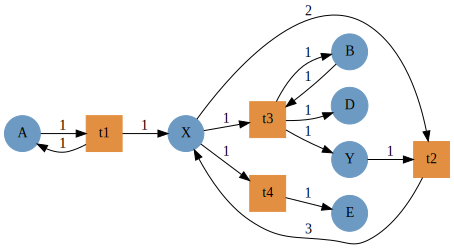

In [4]:
Brusselator= LabelledPetriNet([:A, :B, :D, :E, :X, :Y], 
    :t1 => (:A => (:X, :A)),
    :t2 => ((:X, :X, :Y) => (:X, :X, :X)),
    :t3 => ((:B, :X) => (:Y, :D, :B)),
    :t4 => (:X => :E)
)

#to_graphviz(Graph(Brusselator))
Graph(Brusselator)

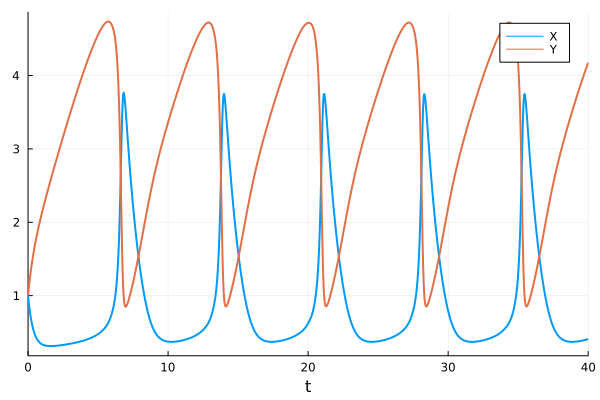

In [6]:
u0 = LVector(A = 1., B = 3., D = 0., E = 0., X = 1., Y = 1.)
p = LVector(t1 = 1., t2 = 1., t3 = 1., t4 = 1.)
tspan = (0.0, 40.0)

Brusselator_vf = vectorfield(Brusselator)
prob = ODEProblem(Brusselator_vf, u0, tspan, p)
sol = solve(prob, Tsit5())

plot(sol, vars = [5,6], lw = 2)